In [1]:
import pickle
print(__doc__)
from time import time

from MulticoreTSNE import MulticoreTSNE as TSNE

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)


Automatically created module for IPython interactive environment


# load data

In [2]:
root_path = "../"
path_model = root_path + 'data/features/'
features_path = path_model + 'data_tfid_hash28_n10000_svd1000_sin_stemmig.p'
#features_path = path_model + 'data_tfid_hash28_n1000_SVD2.p'
X ,y1 ,y2 , y3 = pickle.load( open( features_path, "rb" ) )


In [3]:
train_fraction = 0.9

np.random.seed(42)
train_indices = np.random.choice(X.shape[0], round(train_fraction*X.shape[0]), replace=False)
test_indices = np.array(list(set(range(X.shape[0])) - set(train_indices)))

X_train = X[train_indices]
y_train = y1[train_indices]
X_test = X[test_indices]
y_test = y1[test_indices]

In [4]:
# labels to index, in train 

labels = set(y_test)

y_train_new = []
for yTmp in y_train:
    for idx, label in enumerate(labels):
        if yTmp==label: 
            y_train_new.append(idx)
            
y_test_new = []
for yTmp in y_test:
    for idx, label in enumerate(labels):
        if yTmp==label: 
            y_test_new.append(idx)    

# Calc TSNE

In [5]:

tsne = TSNE(n_jobs=40,
            n_components = 2,
            perplexity=60,
            early_exaggeration = 25.0, # early_exaggeration : float, optional (default: 12.0)
            n_iter = 1000, #1000
            learning_rate=200.0, #200.0
            verbose = 1
           )

tsneData = tsne.fit_transform(X_test)

# VISUALITATION

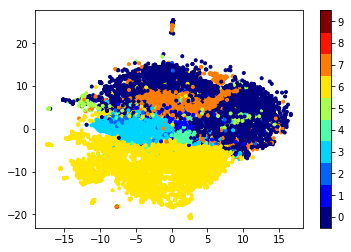

In [6]:
vis_x = tsneData[:, 0]
vis_y = tsneData[:, 1]
plt.scatter(vis_x, vis_y, c=y_test_new, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.rcParams["figure.figsize"] = (15, 15)
plt.show()


# tsne 3D


In [7]:

tsne3 = TSNE(n_jobs=40,
            n_components = 3,
            perplexity=60,
            early_exaggeration = 25.0, # early_exaggeration : float, optional (default: 12.0)
            n_iter = 1000, #1000
            learning_rate=200.0, #200.0
            verbose = 1
           )

tsne3Data = tsne3.fit_transform(X_test)

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = tsne3Data[:, 0]
y = tsne3Data[:, 1]
z = tsne3Data[:, 2]


ax.scatter(x, y, z, c=y_test_new,cmap=plt.cm.get_cmap("jet", 10), marker='*')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.rcParams["figure.figsize"] = (5, 5)
plt.show()

<IPython.core.display.Javascript object>

NameError: name 'Y3' is not defined